In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
data= pd.read_csv('Restaurant_Reviews.tsv', quoting=3, delimiter='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

In [4]:
lst = []
ps = PorterStemmer()
for i in range(0,1000):
    #removing the numeric and other symbolic character and store them in a lst
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i]).lower().split()
    review = [ ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    lst.append(review)


In [5]:
lst

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [6]:
#creating the bag of words model
#through the process of tokenization

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(max_features = 1500) #taking only 1500 most significant words

In [9]:
X = cv.fit_transform(lst).toarray() 
#sparse matrix
#toarray -> to concert into a matrix

In [10]:
y = data.iloc[:,1].values

In [11]:
#naive bais 
x = X.copy()
Y = y.copy()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size = 0.25, random_state =0)

# RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
"""
for i in np.arange(31,41,2):
    classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cf = confusion_matrix(y_test,y_pred)
    print(cf)
    print()
    
"""
    

'\nfor i in np.arange(31,41,2):\n    classifier = RandomForestClassifier(n_estimators=i, random_state=0)\n    classifier.fit(X_train,y_train)\n    y_pred = classifier.predict(X_test)\n    cf = confusion_matrix(y_test,y_pred)\n    print(cf)\n    print()\n    \n'

In [17]:
#by experimenting with the n_estimators the best one is found at 31
# giving the best result.

In [18]:
classifier = RandomForestClassifier(n_estimators=i, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cf = confusion_matrix(y_test,y_pred,)
print(cf)


[[104  13]
 [ 60  73]]


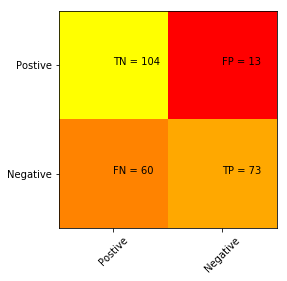

In [19]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cf, interpolation='nearest', cmap=plt.cm.autumn)
classNames = ['Postive','Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf[i][j]))
plt.show()

#### Accuracy - How often it is true?

In [20]:
print((104+73)/250*100)

70.8


In [21]:
from sklearn.metrics import recall_score,precision_score,f1_score

#### Precision - when it predicted positive, how often is correct### 

In [22]:
prec = precision_score(y_test,y_pred)
prec*100

84.88372093023256

#### Recall - when it actually positive, how often does it predict positive


In [23]:
recall = recall_score(y_test,y_pred)
recall*100

54.88721804511278

In [24]:
f1 = f1_score(y_test,y_pred)
f1*100

66.66666666666666

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
cf = GaussianNB()
cf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred = cf.predict(X_test)

In [28]:
cf2 = confusion_matrix(y_test,y_pred)

In [29]:
cf2

array([[ 67,  50],
       [ 20, 113]], dtype=int64)

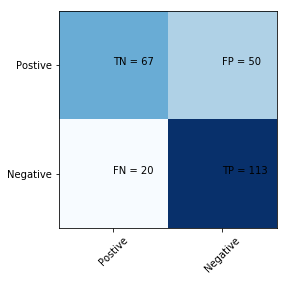

In [30]:

plt.clf()
plt.imshow(cf2, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Postive','Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf2[i][j]))
plt.show()

#### Accuracy - How often it is true?

In [31]:
print((113+67)/250*100)

72.0


### Precision - when it predicted positive, how often is correct

In [32]:
prec = precision_score(y_test,y_pred)
prec*100

69.32515337423312

### Recall - when it actually positive, how often does it predict positive


In [33]:
recall = recall_score(y_test,y_pred)
recall*100

84.9624060150376

In [34]:
f1 = f1_score(y_test,y_pred)
f1*100

76.35135135135135